In [1]:
import warnings 
import itertools 

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('bmh')

C:\Users\welcome\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from io import StringIO
import requests

In [3]:
url = 'http://www.ucanalytics.com/blogs/wp-content/uploads/2015/06/Tractor-Sales.csv'
s=requests.get(url).text


sales_data=pd.read_csv(StringIO(s))

In [4]:
sales_data.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month-Year                144 non-null object
Number of Tractor Sold    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [6]:
sales_data.tail()

,Month-Year,Number of Tractor Sold
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519
143,Dec-14,605


In [7]:
dates=pd.date_range(start='2003-01-01',freq='MS',periods=len(sales_data))
dates[:5]

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01'],
              dtype='datetime64[ns]', freq='MS')

In [8]:
import calendar
sales_data['Month']=dates.month
sales_data.head()

,Month-Year,Number of Tractor Sold,Month
0,Jan-03,141,1
1,Feb-03,157,2
2,Mar-03,185,3
3,Apr-03,199,4
4,May-03,203,5


In [9]:
sales_data['Month']=sales_data['Month'].apply(lambda x:calendar.month_abbr[x])
sales_data['Month'].head()

0    Jan
1    Feb
2    Mar
3    Apr
4    May
Name: Month, dtype: object

In [10]:
sales_data['Year']=dates.year
sales_data.head()

,Month-Year,Number of Tractor Sold,Month,Year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003


In [11]:
sales_data.set_index(dates,inplace=True)
sales_data.drop(['Month-Year'],axis=1,inplace=True)
sales_data.head()

,Number of Tractor Sold,Month,Year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003


In [12]:
sales_data.rename(columns={'Number of Tractor Sold':'Tractor-Sales'},inplace=True)
sales_data.head()

,Tractor-Sales,Month,Year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003


In [13]:
sales_data=sales_data[['Month','Year','Tractor-Sales']]
sales_data.head()

,Month,Year,Tractor-Sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


In [14]:
sales_ts=sales_data['Tractor-Sales']
sales_ts.head()

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
Freq: MS, Name: Tractor-Sales, dtype: int64

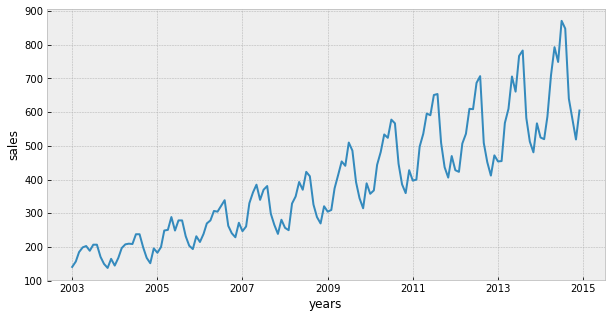

In [15]:
plt.figure(figsize=(10,5))
plt.plot(sales_ts)
plt.xlabel('years')
plt.ylabel('sales')
plt.show()

In [16]:
# Plotting rolling statistics , Dickey-Fuller Test

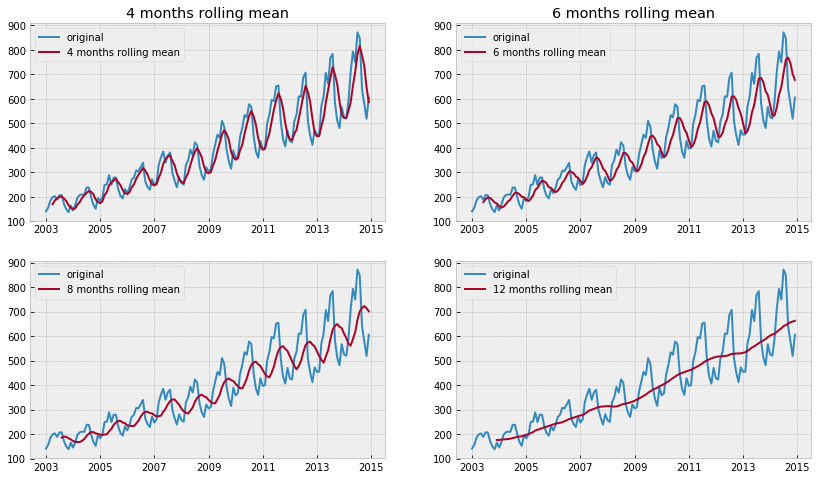

In [17]:
fig,axes=plt.subplots(2,2,sharey=False,sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(sales_ts,label='original')
axes[0][0].plot(sales_ts.rolling(window=4).mean(),label='4 months rolling mean')
axes[0][0].set_title('4 months rolling mean')
axes[0][0].legend()

axes[0][1].plot(sales_ts,label='original')
axes[0][1].plot(sales_ts.rolling(window=6).mean(),label='6 months rolling mean')
axes[0][1].set_title('6 months rolling mean')
axes[0][1].legend()

axes[1][0].plot(sales_ts,label='original')
axes[1][0].plot(sales_ts.rolling(window=8).mean(),label='8 months rolling mean')
axes[1][0].legend()

axes[1][1].plot(sales_ts,label='original')
axes[1][1].plot(sales_ts.rolling(window=12).mean(),label='12 months rolling mean')
axes[1][1].legend()

In [18]:
# Rolling statistics and adf test

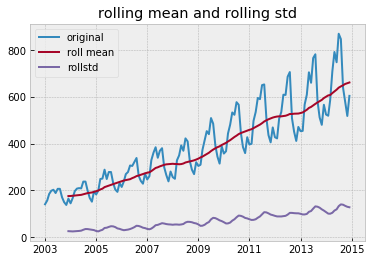

In [19]:
rollmean=sales_ts.rolling(window=12).mean()
rollstd=sales_ts.rolling(window=12).std()

# rolling std

orig=plt.plot(sales_ts,label='original')
mean=plt.plot(rollmean,label='roll mean')
std=plt.plot(rollstd,label='rollstd')
plt.legend()
plt.title('rolling mean and rolling std')

In [20]:
print(np.log10(100),
     np.log10(10))

2.0 1.0


In [21]:
print(np.log(100),
     np.log(10))

4.60517018599 2.30258509299


In [22]:
print(np.log2(100),
     np.log2(10))

6.64385618977 3.32192809489


In [23]:
#Dicky fuller test
from statsmodels.tsa.stattools import adfuller
print('dickey fuller test:')
dftest=adfuller(sales_ts,autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['test statistic','p-value','#lags used','# of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]=value

print(dfoutput)

dickey fuller test:
test statistic              1.108825
p-value                     0.995291
#lags used                 14.000000
# of observations used    129.000000
critical value (1%)        -3.482088
critical value (5%)        -2.884219
critical value (10%)       -2.578864
dtype: float64


In [24]:
# seasonality - time series decomposition
monthly_sales_data=pd.pivot_table(sales_data,values='Tractor-Sales',columns='Year',index='Month')
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Apr,199,208,251,279,362,350,414,482,536,536,610,710
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Dec,165,196,232,272,281,321,389,428,470,472,567,605
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Mar,185,197,249,270,330,329,374,444,498,507,568,587
May,203,210,289,307,385,393,454,534,596,610,706,793


In [25]:
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


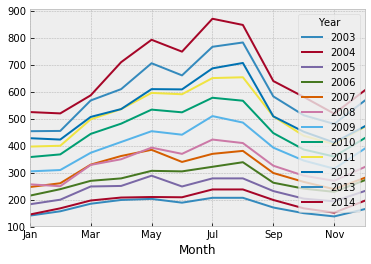

In [26]:
monthly_sales_data.plot()

In [27]:
yearly_sales_data=pd.pivot_table(sales_data,values='Tractor-Sales',index='Year',columns='Month')
yearly_sales_data

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
2003,199,207,165,157,141,207,189,185,203,138,150,171
2004,208,238,196,168,145,238,209,197,210,152,168,199
2005,251,279,232,200,183,279,249,249,289,194,204,232
2006,279,339,272,239,215,322,305,270,307,229,241,263
2007,362,381,281,261,247,370,340,330,385,239,266,299
2008,350,410,321,250,257,423,370,329,393,270,289,326
2009,414,486,389,310,305,510,441,374,454,315,345,393
2010,482,567,428,368,358,578,524,444,534,360,386,447
2011,536,654,470,400,397,651,591,498,596,406,437,509


In [28]:
yearly_sales_data=yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

In [29]:
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281
2008,257,250,329,350,393,370,423,410,326,289,270,321
2009,305,310,374,414,454,441,510,486,393,345,315,389
2010,358,368,444,482,534,524,578,567,447,386,360,428
2011,397,400,498,536,596,591,651,654,509,437,406,470


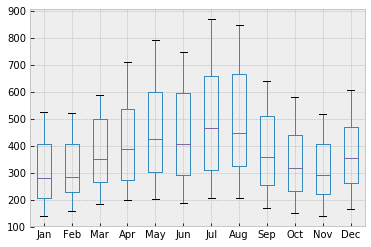

In [30]:
yearly_sales_data.boxplot()

In [31]:
decomposition=sm.tsa.seasonal_decompose(sales_ts,model='Multiplicative')

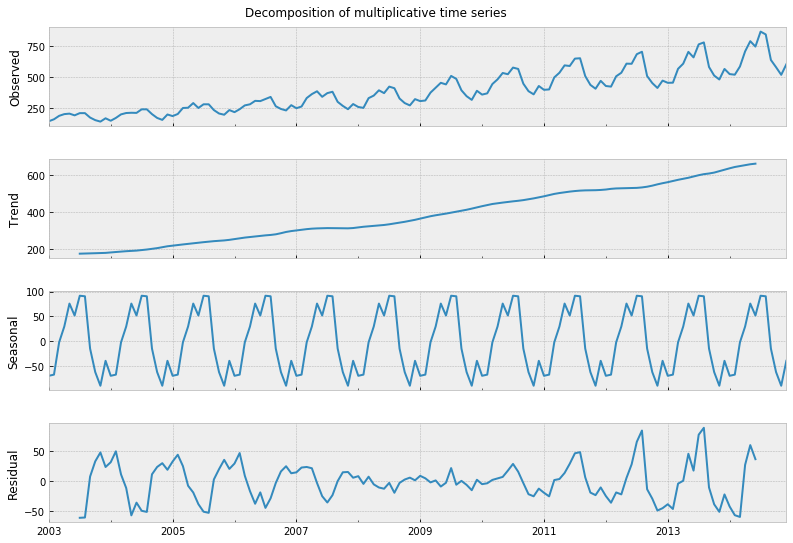

In [32]:
plt.figure(figsize=(12,8))
fig=decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')

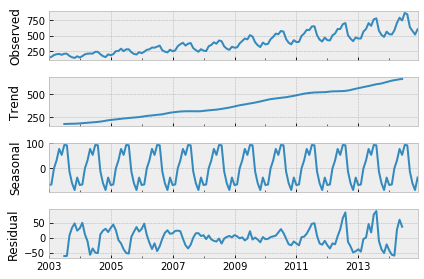

In [33]:
plt.figure(figsize=(12,8))
decomposition.plot()
plt.show()

In [34]:
# Difference data to make data stationary on mean(remove trend)

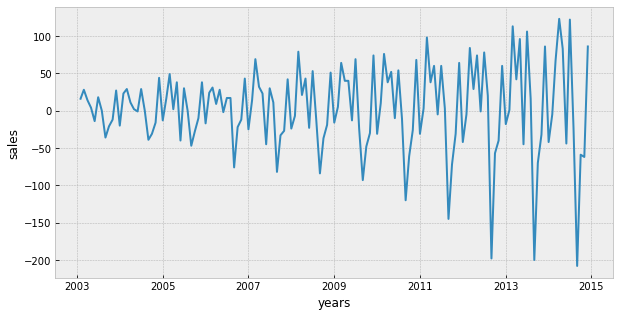

In [35]:
plt.figure(figsize=(10,5))
plt.plot(sales_ts.diff(periods=1))
plt.xlabel('years')
plt.ylabel('sales')

In [36]:
y=sales_ts.diff(periods=1)
y.head()

2003-01-01     NaN
2003-02-01    16.0
2003-03-01    28.0
2003-04-01    14.0
2003-05-01     4.0
Freq: MS, Name: Tractor-Sales, dtype: float64

In [37]:
sales_ts.head()

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
Freq: MS, Name: Tractor-Sales, dtype: int64

In [38]:
z=sales_ts-sales_ts.shift(periods=1)
z.head()

2003-01-01     NaN
2003-02-01    16.0
2003-03-01    28.0
2003-04-01    14.0
2003-05-01     4.0
Freq: MS, Name: Tractor-Sales, dtype: float64

In [39]:
# Log transfromation data to make data stationary on variance
#Here we are using log base 10

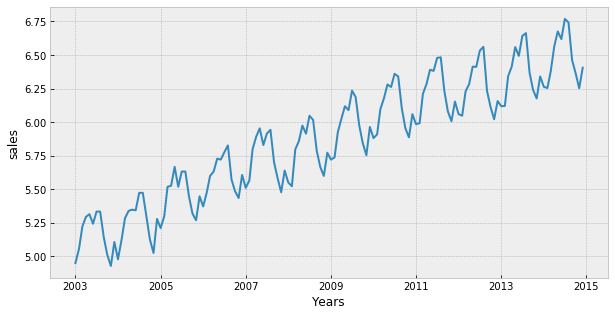

In [40]:
plt.figure(figsize=(10,5))
plt.plot(np.log(sales_ts))
plt.xlabel('Years')
plt.ylabel('sales')

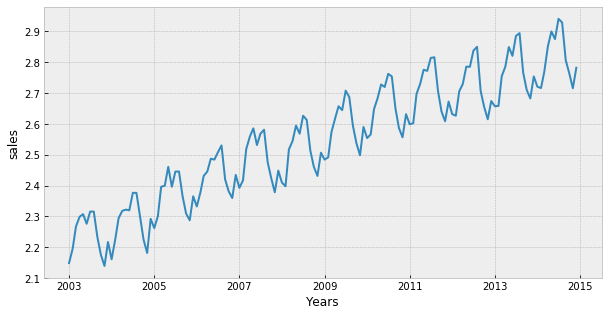

In [41]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(sales_ts))
plt.xlabel('Years')
plt.ylabel('sales')

In [42]:
np.log(sales_ts).head()

2003-01-01    4.948760
2003-02-01    5.056246
2003-03-01    5.220356
2003-04-01    5.293305
2003-05-01    5.313206
Freq: MS, Name: Tractor-Sales, dtype: float64

In [43]:
np.log10(sales_ts).head()

2003-01-01    2.149219
2003-02-01    2.195900
2003-03-01    2.267172
2003-04-01    2.298853
2003-05-01    2.307496
Freq: MS, Name: Tractor-Sales, dtype: float64

In [44]:
sales_ts.head()

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
Freq: MS, Name: Tractor-Sales, dtype: int64

In [45]:
#Differencing log transformation data to make data stationary on both mean and variance

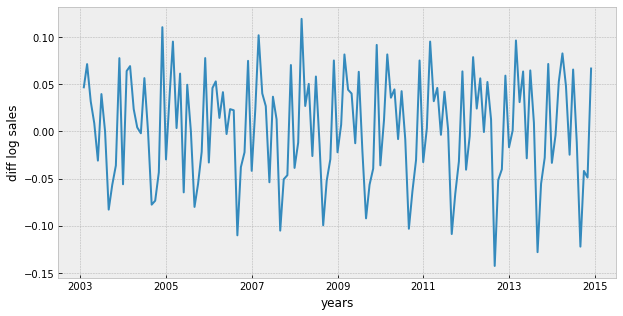

In [46]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(sales_ts).diff(periods=1))
plt.xlabel('years')
plt.ylabel('diff log sales')

In [47]:
sales_ts_log=np.log10(sales_ts)
sales_ts_log_diff=sales_ts_log.diff(periods=1)
sales_ts_log_diff.dropna(inplace=True)

In [48]:
sales_ts_log_diff.head()

2003-02-01    0.046681
2003-03-01    0.071272
2003-04-01    0.031681
2003-05-01    0.008643
2003-06-01   -0.031034
Freq: MS, Name: Tractor-Sales, dtype: float64

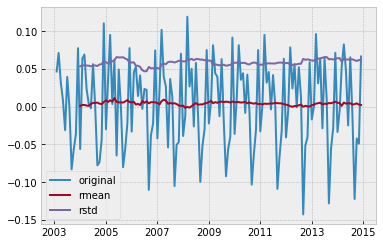

In [49]:
# again doing stationary test
rolmean=sales_ts_log_diff.rolling(window=12).mean()
rolstd=sales_ts_log_diff.rolling(window=12).std()

#ploting rolling stat

original=plt.plot(sales_ts_log_diff,label='original')
rmean=plt.plot(rolmean,label='rmean')
rstd=plt.plot(rolstd,label='rstd')
plt.legend()
plt.show()

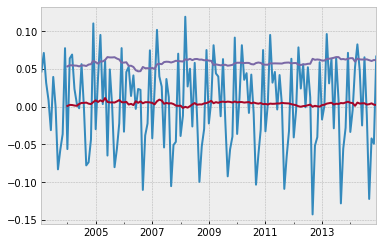

In [50]:
sales_ts_log_diff.plot()
rolmean.plot()
rolstd.plot()

In [51]:
#checking adf test
adf=adfuller(sales_ts_log_diff,autolag='AIC')
adfoutput=pd.Series(adf[0:4],index=['test statistic','p-value','#lags','#observations'])

for key,value in adf[4].items():
    adfoutput['critical value(%s)'%key]=value
print(adfoutput)

test statistic          -2.680467
p-value                  0.077480
#lags                   14.000000
#observations          128.000000
critical value(1%)      -3.482501
critical value(5%)      -2.884398
critical value(10%)     -2.578960
dtype: float64


In [52]:
# by seeing the adf test data is stationary at 90% confidence interval.(test statistic value is less than critical value @ 10%)

In [53]:
#Plot  ACF and PACF to identity potiential AR and MA model

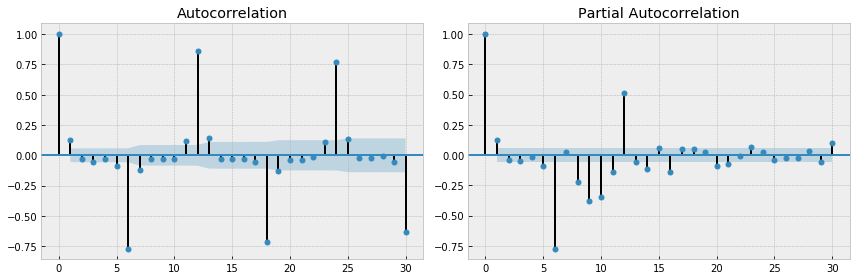

In [54]:
plt.figure(figsize=(12,8))
fig,axes=plt.subplots(1,2,sharey=False,sharex=False)
smt.graphics.plot_acf(sales_ts_log_diff,lags=30,alpha=0.5,ax=axes[0])
smt.graphics.plot_pacf(sales_ts_log_diff,lags=30,alpha=0.5,ax=axes[1])
fig.set_figwidth(12)
fig.set_figheight(4)
plt.tight_layout()

In [55]:
# Identification of best fit ARIMA Model

In [56]:
#define the p,d,q parameters to take any value between 0 and 2
p=d=q=range(0,2)

#generate all different combinations of p,d and triplets
pdq=list(itertools.product(p,d,q))

#generat all different combinations of seasonal p,d,q tirplets
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]



In [57]:
print('pdq')
print(pdq)
print('\n')
print('seasonal pdq')
print(seasonal_pdq)


pdq
[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


seasonal pdq
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [58]:
import sys
warnings.filterwarnings('ignore') # specify to ignore warning messages

best_aic=np.inf
best_pdq=None
best_seasonal_pdq=None
temp_model=None


for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model=sm.tsa.statespace.SARIMAX(sales_ts_log,
                                                 order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_starionarity=True,
                                                enforce_invertibility=True)
            results=temp_model.fit()
            
            if results.aic<best_aic:
                best_aic=results.aic
                best_pdq=param
                best_seasonal_pdq=param_seasonal
        except:
            
            continue
            
print('Best SARIMAX{}X{}12 model - AIC:{}'.format(best_pdq,best_seasonal_pdq,best_aic))
    



Best SARIMAX(0, 1, 1)X(1, 0, 1, 12)12 model - AIC:-733.7733673716689


In [59]:
#the ideal model is with minimum AIC Value

In [60]:
# comparing our model with blog model - blog parm (0,1,1),seasonalparam(0,1,1,12)

blog_param_order=(0,1,1)
blog_param_seasonal_order=(0,1,1,12)

blog_model=sm.tsa.statespace.SARIMAX(sales_ts_log,
                                    order=blog_param_order,
                                    seasonal_order=blog_param_seasonal_order,
                                    enforce_stationary=True,
                                    enforce_invertibility=True)

blog_results=blog_model.fit()

print('blog sarimax{}x{} 12 model- AIC:{}'.format(blog_param_order,blog_param_seasonal_order,blog_results.aic))

blog sarimax(0, 1, 1)x(0, 1, 1, 12) 12 model- AIC:-702.7798971378229


In [61]:
#predict sales on in sample data using the best fit ARIMA model

In [62]:
best_model=sm.tsa.statespace.SARIMAX(sales_ts_log,
                                    order=(0,1,1),
                                    seasonal_order=(1,0,1,12),
                                    enforce_stationarity=True,
                                    enforce_invertibility=True)

best_results=best_model.fit()

In [63]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                      Tractor-Sales   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 370.887
Date:                            Wed, 07 Feb 2018   AIC                           -733.773
Time:                                    11:38:09   BIC                           -721.894
Sample:                                01-01-2003   HQIC                          -728.946
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3574      0.069     -5.197      0.000      -0.492      -0.223
ar.S.L12       0.9934      0.006   

In [64]:
print(best_results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                      Tractor-Sales   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 370.887
Date:                            Wed, 07 Feb 2018   AIC                           -733.773
Time:                                    11:38:09   BIC                           -721.894
Sample:                                01-01-2003   HQIC                          -728.946
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3574      0.069     -5.197      0.000      -0.492      -0.223
ar.S.L12       0.9934      0.006   

In [65]:
pred_dynamic=best_results.get_prediction(start=pd.to_datetime('2012-01-01'),dynamic=True,full_results=True)

pred_dynamic_ci=pred_dynamic.conf_int()

In [66]:
pred_dynamic_ci.head()

,lower Tractor-Sales,upper Tractor-Sales
2012-01-01,2.613998,2.676202
2012-02-01,2.615947,2.689886
2012-03-01,2.700216,2.784267
2012-04-01,2.728816,2.821887
2012-05-01,2.767932,2.869222


In [67]:
pred_dynamic

In [68]:
# Extract the predicted and true values of our time series
sales_ts_forecasted=pred_dynamic.predicted_mean
sales_ts_truth=sales_ts_log['2012-01-01':]

In [69]:
sales_ts_forecasted.head()

2012-01-01    2.645100
2012-02-01    2.652916
2012-03-01    2.742242
2012-04-01    2.775352
2012-05-01    2.818577
Freq: MS, dtype: float64

In [70]:
sales_ts_truth.head()

2012-01-01    2.631444
2012-02-01    2.626340
2012-03-01    2.705008
2012-04-01    2.729165
2012-05-01    2.785330
Freq: MS, Name: Tractor-Sales, dtype: float64

In [71]:
#Compute mean squred error
mse=((sales_ts_forecasted-sales_ts_truth)**2).mean()
print('mean squarted error of our forecast is {}'.format(round(mse,4)))

mean squarted error of our forecast is 0.0011


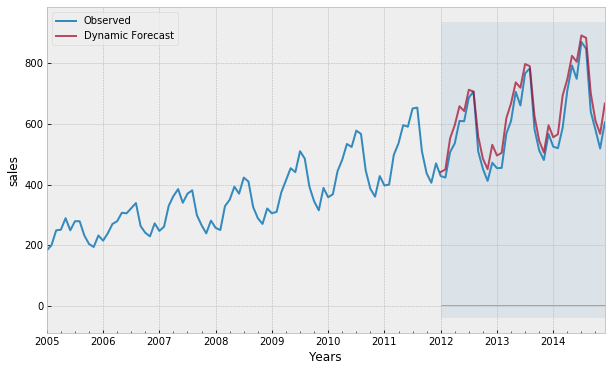

In [72]:
axis=sales_ts['2005':].plot(label='Observed',figsize=(10,6))
np.power(10,pred_dynamic.predicted_mean).plot(ax=axis,label='Dynamic Forecast',alpha=0.7)
axis.fill_between(pred_dynamic_ci.index,pred_dynamic_ci.iloc[:,0],pred_dynamic_ci.iloc[:,1],color='k',alpha=0.25)
axis.fill_betweenx(axis.get_ylim(),pd.to_datetime('2012-01-01'),sales_ts.index[-1],alpha=0.1,zorder=-1)
plt.xlabel('Years')
plt.ylabel('sales')
plt.legend()


In [73]:
np.log10(150)

2.1760912590556813

In [74]:
np.power(10,2.176)

149.96848355023741

In [75]:
pred_dynamic_ci.index

DatetimeIndex(['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [76]:
pred_dynamic_ci.iloc[:,0].head()

2012-01-01    2.613998
2012-02-01    2.615947
2012-03-01    2.700216
2012-04-01    2.728816
2012-05-01    2.767932
Freq: MS, Name: lower Tractor-Sales, dtype: float64

In [77]:
pred_dynamic_ci.iloc[:,1].head()

2012-01-01    2.676202
2012-02-01    2.689886
2012-03-01    2.784267
2012-04-01    2.821887
2012-05-01    2.869222
Freq: MS, Name: upper Tractor-Sales, dtype: float64

In [78]:
# Forecast sales using the best fit ARIMA model
#The next step is to predict the tractor sales for next 3 years i.e for 2015,2016,2017

In [79]:
#get forecast 36 steps(3years) ahead in future

n_steps=36
pred_uc_99=best_results.get_forecast(steps=36,alpha=0.01)# alpha =0.01 signifies 99% confidence interval
pred_uc_95=best_results.get_forecast(steps=36,alpha=0.05)#alpha=0.05 95% ci

#get confidence intervals 95% and 99% of the forecasts
pred_ci_99=pred_uc_99.conf_int()
pred_ci_95=pred_uc_95.conf_int()

In [80]:
pred_uc_99

In [81]:
pred_ci_99.head()

,lower Tractor-Sales,upper Tractor-Sales
2015-01-01,2.722832,2.785034
2015-02-01,2.716024,2.789961
2015-03-01,2.783386,2.867435
2015-04-01,2.831551,2.924620
2015-05-01,2.878911,2.980200


In [82]:
n_steps=36
idx=pd.date_range(sales_ts.index[-1],periods=n_steps,freq='MS')
fc_95=pd.DataFrame(np.column_stack([np.power(10,pred_uc_95.predicted_mean),np.power(10,pred_ci_95)]),index=idx,
                   columns=['forecast','lower_ci_95','upper_ci_95'])
fc_99=pd.DataFrame(np.column_stack([np.power(10,pred_ci_99)]),index=idx,columns=['lower_ci_99','upper_ci_99'])
fc_all=fc_95.combine_first(fc_99)
fc_all=fc_all[['forecast','lower_ci_95','upper_ci_95','lower_ci_99','upper_ci_99']]

In [83]:
sales_ts.index[-1]

Timestamp('2014-12-01 00:00:00', freq='MS')

In [84]:
idx[:5]

DatetimeIndex(['2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
               '2015-04-01'],
              dtype='datetime64[ns]', freq='MS')

In [85]:
fc_95.head()

,forecast,lower_ci_95,upper_ci_95
2014-12-01,567.456687,528.240504,609.584249
2015-01-01,566.229020,520.024180,616.539221
2015-02-01,668.976317,607.275832,736.945699
2015-03-01,755.240824,678.501349,840.659643
2015-04-01,850.266908,756.677085,955.432415


In [86]:
fc_99.head()

,lower_ci_99,upper_ci_99
2014-12-01,528.240504,609.584249
2015-01-01,520.024180,616.539221
2015-02-01,607.275832,736.945699
2015-03-01,678.501349,840.659643
2015-04-01,756.677085,955.432415


In [87]:
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2014-12-01,567.456687,528.240504,609.584249,528.240504,609.584249
2015-01-01,566.229020,520.024180,616.539221,520.024180,616.539221
2015-02-01,668.976317,607.275832,736.945699,607.275832,736.945699
2015-03-01,755.240824,678.501349,840.659643,678.501349,840.659643
2015-04-01,850.266908,756.677085,955.432415,756.677085,955.432415


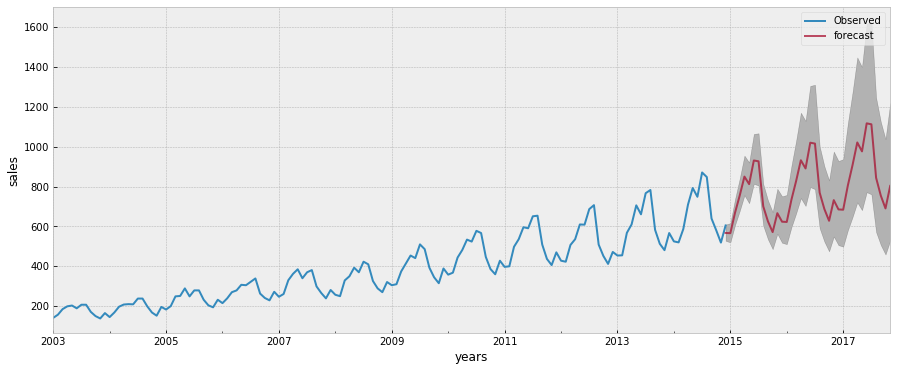

In [99]:
# plot the forecast along with the confidence band
axis=sales_ts.plot(label='Observed',figsize=(15,6))
fc_all['forecast'].plot(label='forecast',alpha=0.7,ax=axis)
axis.fill_between(fc_all.index,fc_all['lower_ci_95'],fc_all['upper_ci_95'],color='k',alpha=0.25)
axis.set_xlabel('years')
axis.set_ylabel('sales')
plt.legend()

In [100]:
# plot ACF AND PACF for residuals of ARIMA model to ensure no more information is left for extraction

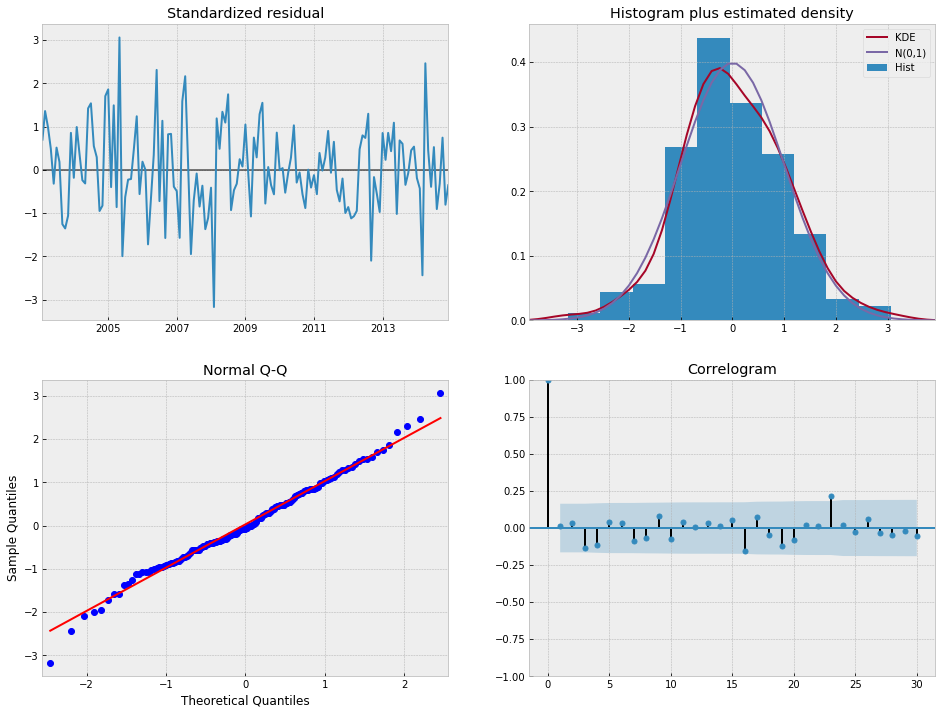

In [103]:
best_results.plot_diagnostics(lags=30,figsize=(16,12))
plt.show()

We need to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If it is not that it signifies that the model can be further improved and we repeat the process with the residuals.

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

The KDE plot of the residuals on the top right is almost similar with the normal distribution.

The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.

The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

In [104]:
# Regression with arima errors

For the last 4 years, PowerHorse tractors is running an expensive marketing and farmer connect program to boost their sales. They are interested in learning the impact of this program on overall sales. As a data science consultant we are helping them with this effort.

This is an interesting problem and requires a thorough analysis followed by creative solutions and scientific monitoring mechanism

In [106]:
url = 'http://ucanalytics.com/blogs/wp-content/uploads/2017/08/sales-and-marketing.csv'
s=requests.get(url).text
mkt_sales_data=pd.read_csv(StringIO(s))

In [107]:
mkt_sales_data.head()

,Time Period,Sales,Marketing Expense
0,Jan-11,397,486.64
1,Feb-11,400,501.80
2,Mar-11,498,437.09
3,Apr-11,536,565.16
4,May-11,596,744.15


In [108]:
mkt_sales_data.set_index(pd.date_range(start='2011-01-01',freq='MS',periods=len(mkt_sales_data)),inplace=True)
mkt_sales_data.head()

,Time Period,Sales,Marketing Expense
2011-01-01,Jan-11,397,486.64
2011-02-01,Feb-11,400,501.80
2011-03-01,Mar-11,498,437.09
2011-04-01,Apr-11,536,565.16
2011-05-01,May-11,596,744.15


In [109]:
mkt_sales_data.drop(['Time Period'],axis=1,inplace=True)
mkt_sales_data.rename(columns={'Sales':'Tractor-Sales'},inplace=True)
mkt_sales_data.head()

,Tractor-Sales,Marketing Expense
2011-01-01,397,486.64
2011-02-01,400,501.80
2011-03-01,498,437.09
2011-04-01,536,565.16
2011-05-01,596,744.15


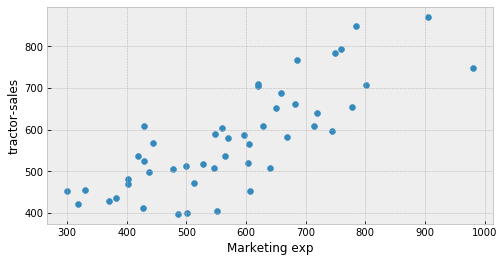

In [112]:
plt.figure(figsize=(8,4))
plt.scatter(x=mkt_sales_data['Marketing Expense'],y=mkt_sales_data['Tractor-Sales'])
plt.xlabel('Marketing exp')
plt.ylabel('tractor-sales')

In [113]:
print('Correlation for Marketing Data:{}'.format(round(mkt_sales_data.corr()['Marketing Expense']['Tractor-Sales'],2)))

Correlation for Marketing Data:0.8


**This looks promising with quite a high correlation coefficient ( ρρ  > 0.8). However, there is a lurking danger in analyzing non-stationary time series data. Since two uncorrelated series can display high correlation because of time series trend in data. In this case, PowerHorse is a growing company and the latent factor is 'growth' of the company. Hence both its sales and marketing expenses can be on an upward curve independent of each other. To investigat that a better way is to find the correlation between stationary data obtained through differencing of marketing expediture and the trator sales data individually.**

The following is the correlation plot for stationary data:

In [114]:
mkt_sales_data_diff=mkt_sales_data.diff(periods=1)
mkt_sales_data_diff.dropna(inplace=True)

mkt_sales_data_diff.head()

,Tractor-Sales,Marketing Expense
2011-02-01,3.0,15.16
2011-03-01,98.0,-64.71
2011-04-01,38.0,128.07
2011-05-01,60.0,178.99
2011-06-01,-5.0,-195.41


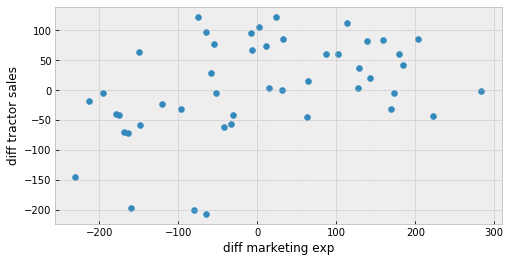

In [116]:
plt.figure(figsize=(8,4))
plt.scatter(x=mkt_sales_data_diff['Marketing Expense'],y=mkt_sales_data_diff['Tractor-Sales'])
plt.xlabel('diff marketing exp')
plt.ylabel('diff tractor sales')

In [117]:
print('correlation of diff marketing exp and diff sales : {}'
      .format(round(mkt_sales_data_diff.corr()['Marketing Expense']['Tractor-Sales'],2)))


correlation of diff marketing exp and diff sales : 0.41


Ok, so that near perfect correlation has now disappeared though there is still some correlation in this data ( ρρ  = 0.41).

Typically, the marketing effort for the previous few months needs to have a good correlation with sales for an effective marketing program. The marketing expense for the last month as displayed below has very little correlation ( ρρ  = 0.17):


In [118]:
len(mkt_sales_data_diff)

47

In [119]:
prev_months_corr_data=pd.DataFrame(np.column_stack((\
                                                   mkt_sales_data_diff['Marketing Expense'][0:46].values,\
                                                   mkt_sales_data_diff['Tractor-Sales'][1:47].values)),\
                                  columns=['previous months differenced marketing exp','differenced tractor sales'])

In [121]:
prev_months_corr_data.head()

,previous months differenced marketing exp,differenced tractor sales
0,15.16,98.0
1,-64.71,38.0
2,128.07,60.0
3,178.99,-5.0
4,-195.41,60.0


In [124]:
mkt_sales_data_diff.head()

,Tractor-Sales,Marketing Expense
2011-02-01,3.0,15.16
2011-03-01,98.0,-64.71
2011-04-01,38.0,128.07
2011-05-01,60.0,178.99
2011-06-01,-5.0,-195.41


In [122]:
 mkt_sales_data_diff['Marketing Expense'].head()

2011-02-01     15.16
2011-03-01    -64.71
2011-04-01    128.07
2011-05-01    178.99
2011-06-01   -195.41
Freq: MS, Name: Marketing Expense, dtype: float64

In [123]:
mkt_sales_data_diff['Tractor-Sales'].head()

2011-02-01     3.0
2011-03-01    98.0
2011-04-01    38.0
2011-05-01    60.0
2011-06-01    -5.0
Freq: MS, Name: Tractor-Sales, dtype: float64